# 경사하강법 구현

In [66]:
import numpy as np
import matplotlib.pyplot as plt
n = 20
x = np.random.randn(n)
y = 3 * x + 4 + np.random.randn(n)

num_epoch = 10
lr = 1.3 # 0.1 ~ 2.0 learning rate
w = np.random.uniform()
b = np.random.uniform()
for epoch in range(num_epoch): # 경사하강법 구현
    y_pred = w*x + b
    e = y_pred - y
    error = np.abs(e).mean()
    print(f"{epoch:2} w = {w:.3f}, b = {b:.3f}, error = {error:.3f}")

    w = w - lr*(e*x).mean()
    b = b - lr*e.mean()

 0 w = 0.786, b = 0.532, error = 4.000
 1 w = 5.279, b = 5.288, error = 2.764
 2 w = 1.780, b = 2.551, error = 1.904
 3 w = 4.224, b = 4.392, error = 1.550
 4 w = 2.537, b = 3.127, error = 1.101
 5 w = 3.699, b = 3.998, error = 1.010
 6 w = 2.899, b = 3.398, error = 0.869
 7 w = 3.450, b = 3.812, error = 0.835
 8 w = 3.070, b = 3.527, error = 0.836
 9 w = 3.332, b = 3.723, error = 0.796


# 남여 키-몸무게 예측

1.6666666666666667
-218.33333333333331
1.0
-103


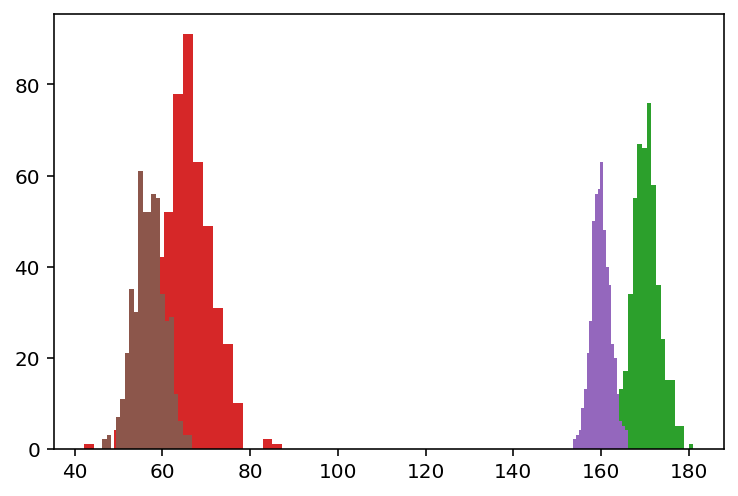

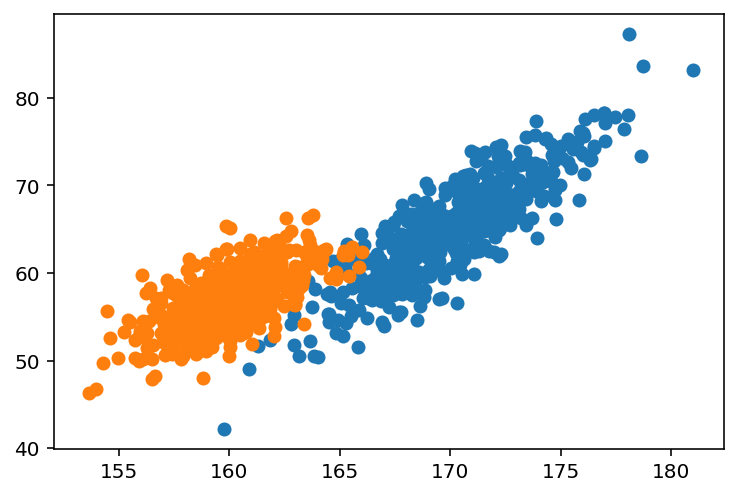

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# data generation
# 키, 몸무게
n = 500
x1 = np.random.randn(n)*3.0 + 170
x2 = np.random.randn(n)*2.0 + 160

plt.hist(x1, bins=20)
plt.hist(x2, bins=20)
a1 = (10./6.) ; print(a1)
b1 = (60-10*167/6.); print(b1)
a2 = 1.0 ; print(a2)
b2 = 62 - 165 ; print(b2)

y1 = a1*x1 + b1 + np.random.randn(n)*3.0
y2 = a2*x2 + b2 + np.random.randn(n)*2.5
plt.hist(x1, bins=20)
plt.hist(y1, bins=20)
plt.hist(x2, bins=20)
plt.hist(y2, bins=20)
plt.show()
plt.scatter(x1,y1)
# plt.show()
plt.scatter(x2,y2)
plt.show()

0.7254482042680503


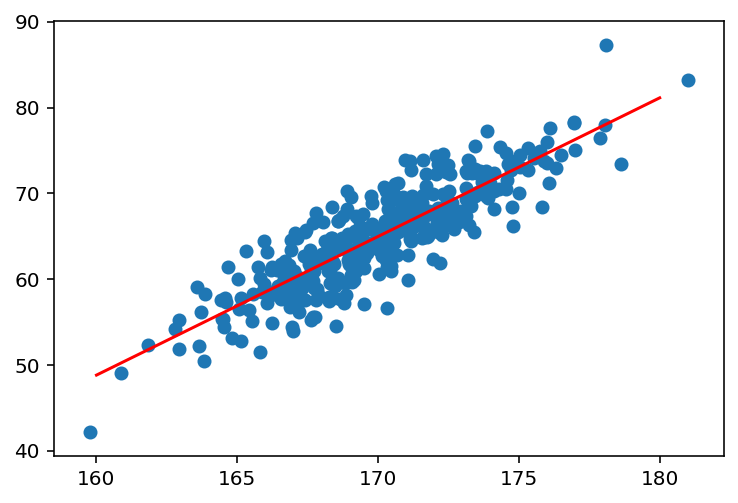

In [49]:
from sklearn.model_selection import train_test_split
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x1,y1) # 75%
# 남성 키 --> 몸무게 예측: M1
from sklearn.linear_model import LinearRegression
M1 = LinearRegression() # (1) 모델 구조 선택
M1.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M1.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square

w1, b1 = M1.coef_, M1.intercept_
xs = np.linspace(160,180,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
plt.scatter(X_train,y_train)

In [50]:
z = np.arange(10)
# np.random.seed(999)
a,b = train_test_split(z, test_size=0.3, random_state=999) # 훈련용은 70%
a,b

(array([4, 3, 7, 9, 1, 5, 0]), array([6, 2, 8]))

In [51]:
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x2,y2) # 75%
M2 = LinearRegression() # (1) 모델 구조 선택
M2.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M2.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square


0.48088169010180615


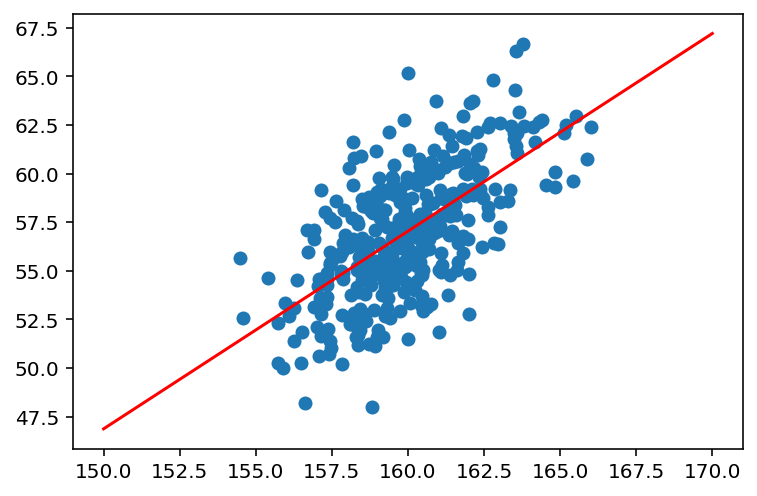

In [52]:
w1, b1 = M2.coef_, M2.intercept_
xs = np.linspace(150,170,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
# plt.scatter(x1,y1)
plt.scatter(X_train,y_train)

In [53]:
x = np.hstack((x1,x2))
y = np.hstack((y1,y2))

np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x,y) # 75%
M3 = LinearRegression() # (1) 모델 구조 선택
M3.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M3.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square


0.7014272934480272


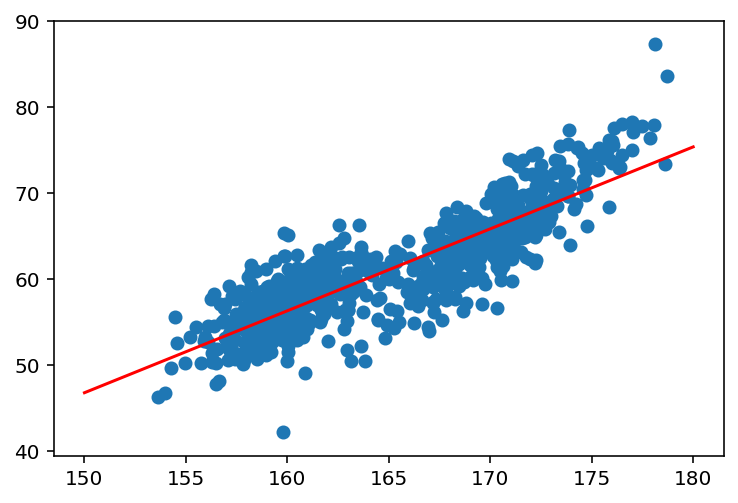

In [54]:
w1, b1 = M3.coef_, M3.intercept_
xs = np.linspace(150,180,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
# plt.scatter(x1,y1)
plt.scatter(X_train, y_train)

# 성별을 고려한 성능 개선

In [55]:
z= np.vstack((x, y)) # 수직으로 합치기
P = z.T
# 남성 0, 여성 1
s = n * [1] + n * [0]
df =pd.DataFrame(P, columns=[['height', 'weight']])
df['sex'] = s

y = df[['weight']]   # 데이터프레임을 편리하게 사용
X = df[["height", "sex"]]
# y = df.values[:,1]  # ndarray로 직접 처리, 속도가 빠르다
# X = df.values[:,(0,2)]
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(X,y) # 75%
M4 = LinearRegression() # (1) 모델 구조 선택
M4.fit(X_train,y_train) # (2) 학습 수행
print(M4.score(X_test, y_test)) # (3) 모델 사용후 채점 R-square


0.7688008332727753


In [56]:
M4.coef_

array([[ 1.44676484, -6.39959644]])

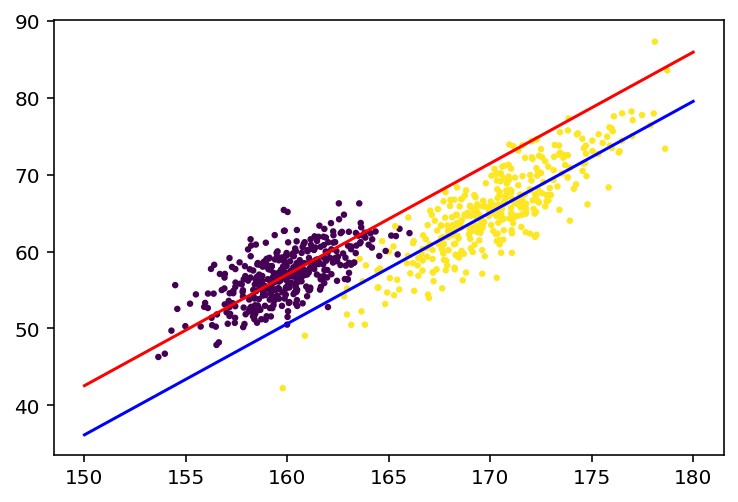

In [57]:
a1, a2, b = M4.coef_[0][0], M4.coef_[0][1], M4.intercept_
xs = np.linspace(150,180,2) # fitting 라인 그리기
plt.plot(xs, a1*xs + a2*1 + b, c='b') # 남성은 성별 컬럼이 0
plt.plot(xs, a1*xs + a2*0 + b, c='r') # 여성은 1
plt.scatter(X_train[["height"]], y_train, c =X_train[["sex"]] , s=5)

## 회귀 예측치와 실제값 비교

In [81]:
(y_train.values.ravel()).shape

(750,)

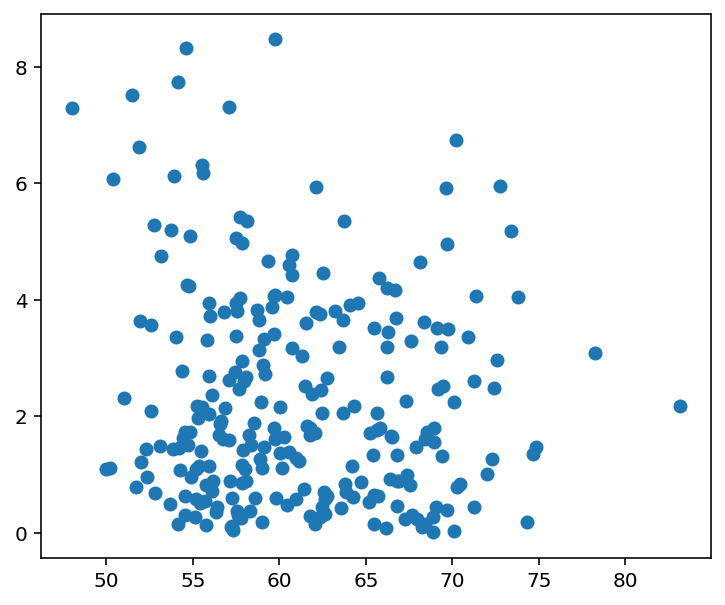

In [114]:
# y_test_real = y_test.values
plt.figure(figsize=(6,5))

y_pred = M4.predict(X_test)
# plt.plot(y_test.values[:50],c='r', marker='o')
# plt.plot(y_pred[:50]-y_test.values[:50], c='b',marker='^')
plt.scatter(y_test.values, np.abs(y_pred-y_test.values)) # 오차의 절대치 분포

In [11]:
a1, a2, b

(1.5217742530391556, -7.5433519854605136, array([-186.3812363]))

# 이진분류 문제  키, 몸무게 --> 성별

In [13]:
X = df[['height', 'weight']]
y = df[['sex']]

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
from sklearn.linear_model import SGDClassifier
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(X_sc,y) # 75%
M5 = SGDClassifier() # (1) 모델 구조 선택
M5.fit(X_train,y_train) # (2) 학습 수행
print(M5.score(X_test, y_test)) # (3) 모델 사용후 채점 분류: accuracy

0.98


/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
a1, a2, b = M5.coef_[0][0], M5.coef_[0][1], M5.intercept_
a1, a2, b

(10.387301679928338, -2.7406690136553102, array([-0.50363579]))

In [19]:
X_origin = sc.inverse_transform(X_sc)
X_origin

array([[171.06826887,  63.24988333],
       [173.54193627,  76.14098126],
       [173.02563356,  69.59522681],
       ...,
       [155.056138  ,  47.66214099],
       [157.94926981,  50.24498386],
       [156.83397891,  58.20829736]])

In [20]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

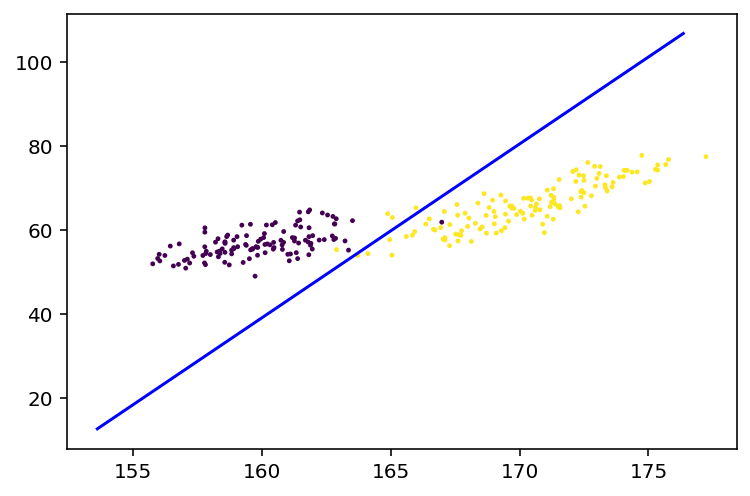

In [27]:
a1, a2, b = M5.coef_[0][0], M5.coef_[0][1], M5.intercept_
xs = np.linspace(-2,2,2)
plt.scatter(X_test[:,0]*s1+m1,X_test[:,1]*s2+m2, s=2, c=y_test.values.ravel())
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [24]:
y_train.values.ravel()

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [25]:
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [26]:
y_pred = M5.predict(X_test) # (3)  분류 예측에 적용 inference
y_pred[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [33]:
res = y_test

In [35]:
res["pred"]=y_pred

/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sex,pred
842,0,0
68,1,1
308,1,1
881,0,0
350,1,1
...,...,...
398,1,1
627,0,0
394,1,1
79,1,0


In [46]:
(res[["pred"]].values == res[["sex"]].values).sum()

245

In [105]:
s = pd.Series([10,20,3,4,5])
type(s)

pandas.core.series.Series

In [107]:
res.values

array([[0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

In [106]:
s.values

array([10, 20,  3,  4,  5])

In [97]:
k = np.arange(12);k.reshape(-1,1) # (샘플수, 모양1, 모양2, 피처수)
# inpup_shape (224, 224, 3)

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])